# Data Cleaning and Data Exploration

Here we'll see how data looks in this dataset provided by PubChem. Dataset is already in the folder, but if you want to dowloand by yourself, you can access it in the following link:
[qHTS assay to identify small molecule agonists of the androgen receptor (AR) signaling pathway: Summary](https://pubchem.ncbi.nlm.nih.gov/bioassay/743053#section=Result-Definitions)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/StevieCL/Random_Forest_Classifier_AR/master/Files/AID_743053_datatable_all.csv')
df = data.copy()

## Quick overview of data and some data cleaning:

In [3]:
df.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity Summary,Ratio Activity,Ratio Potency (uM),Ratio Efficacy (%),530 nm Activity,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Blue (460 nm) auto fluorescence outcome,Sample Source
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,STRING,STRING,FLOAT,FLOAT,STRING,FLOAT,FLOAT,STRING,FLOAT,FLOAT,STRING,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,Type of compound activity based on both the AR...,Type of compound activity in the ratio readout...,The concentration of sample yielding half-maxi...,Percent activation in the ratio readout of the...,Type of compound activity in the 530 nm readou...,The concentration of sample yielding half-maxi...,Percent activation in the 530 nm readout of th...,Type of compound activity in the 460 nm readou...,The concentration of sample yielding half-maxi...,Percent activation in the 460 nm readout of th...,Type of compound activity in the auto fluoresc...,Where sample was obtained.
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NONE,MICROMOLAR,PERCENT,NONE,MICROMOLAR,PERCENT,NONE,MICROMOLAR,PERCENT,NONE,NONE
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,144203552.0,12850184.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,inactive,NaN,0,inactive,NCI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10490 entries, 0 to 10489
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PUBCHEM_RESULT_TAG                       10490 non-null  object 
 1   PUBCHEM_SID                              10486 non-null  float64
 2   PUBCHEM_CID                              10337 non-null  float64
 3   PUBCHEM_ACTIVITY_OUTCOME                 10486 non-null  object 
 4   PUBCHEM_ACTIVITY_SCORE                   10486 non-null  float64
 5   PUBCHEM_ACTIVITY_URL                     0 non-null      float64
 6   PUBCHEM_ASSAYDATA_COMMENT                0 non-null      float64
 7   Activity Summary                         10489 non-null  object 
 8   Ratio Activity                           10489 non-null  object 
 9   Ratio Potency (uM)                       1107 non-null   object 
 10  Ratio Efficacy (%)                       10203

We can observe that there are columns with no data like PUBCHEM_ACTIVITY_URL and PUBCHEM_ASSAYDATA_COMMENT. Also we can observe there are important columns with some null data as Ratio Potency (uM), PUBCHEM_CID and others.

Columns of dataframe: 

In [5]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'PUBCHEM_ASSAYDATA_COMMENT', 'Activity Summary',
       'Ratio Activity', 'Ratio Potency (uM)', 'Ratio Efficacy (%)',
       '530 nm Activity', '530 nm Potency (uM)', '530 nm Efficacy (%)',
       '460 nm Activity', '460 nm Potency (uM)', '460 nm Efficacy (%)',
       'Blue (460 nm) auto fluorescence outcome', 'Sample Source'],
      dtype='object')

We're going to delete the first four rows because there is not important information there.

In [6]:
df = df[4:]
df.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity Summary,Ratio Activity,Ratio Potency (uM),Ratio Efficacy (%),530 nm Activity,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Blue (460 nm) auto fluorescence outcome,Sample Source
4,1,144203552.0,12850184.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,inactive,NaN,0,inactive,NCI
5,2,144203553.0,89753.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,inactive,NaN,0,inactive,NCI
6,3,144203554.0,9403.0,Active,53.0,NaN,NaN,active agonist,active agonist,2.58222,110.384,inactive,NaN,0,active agonist,3.25083,123.948,inactive,NCI
7,4,144203555.0,13218779.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,inactive,NaN,0,inactive,NCI
8,5,144203556.0,142766.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,inactive,NaN,0,inactive,NCI


We're going to make some changes and replacements in data. 

* Some missing values will be replaced by 0. (some columns where we think it doesn't affect the analysis).

* It will be modified data type of some columns in order to be able to work with that data. 

* **IMPORTANT**: NaN values in **Ratio Potency (uM)** column are related to inactive compounds. In the first instance, it was decided to replace these values by 0 (zero), but there were some problems with model's prediction and biochemical concepts, so we decided to replace such NaN values by 100. This is an aspect we can improve in this model.

In [ ]:
df['PUBCHEM_CID'][df['PUBCHEM_CID'].isnull()] = 0  # Null values are replaced by 0 in PUBCHEM_CID column
df['PUBCHEM_CID'] = df['PUBCHEM_CID'].astype(int)  # Values are converted into int values

df['PUBCHEM_SID'][df['PUBCHEM_SID'].isnull()] = 0  # Null values are replaced by 0 in PUBCHEM_SID column
df['PUBCHEM_SID'] = df['PUBCHEM_SID'].astype(int)  # Values are converted into int values

df['Ratio Potency (uM)'][df['Ratio Potency (uM)'].isnull()] = 100        # Null values are replaced by 0 in Ratio Potency uM)
df['PUBCHEM_ACTIVITY_SCORE'] = df['PUBCHEM_ACTIVITY_SCORE'].astype(int)  # Values are converted into int values

df['530 nm Potency (uM)'][df['530 nm Potency (uM)'].isnull()] = 0  # Null values are replaced by 0 in '530 nm Potency (uM)' column
df['460 nm Potency (uM)'][df['460 nm Potency (uM)'].isnull()] = 0  # Null values are replaced by 0 in 460 nm Potency (uM) column

df['Ratio Efficacy (%)'] = df['Ratio Efficacy (%)'].astype(float)  # Values are converted into float values

Index is defined as range of 10486. Some columns are deleted because there's no important information in there. 

In [8]:
df.index = range(10486)
df.index.name = ''
del(df['PUBCHEM_RESULT_TAG'])
del(df['PUBCHEM_ACTIVITY_URL']) 
del(df['PUBCHEM_ASSAYDATA_COMMENT'])
del(df['Sample Source'])

Columns names are modified in order to work easier with them.

In [9]:
df.columns = ['SID', 'CID', 'Activity_Outcome',
       'Activity_Score', 'Activity_Summary', 'Ratio_Activity',
       'Ratio_Potency_(uM)', 'Ratio_Efficacy (%)', '530 nm Activity',
       '530 nm Potency (uM)', '530 nm Efficacy (%)', '460 nm Activity',
       '460 nm Potency (uM)', '460 nm Efficacy (%)',
       'Blue (460 nm) auto fluorescence outcome']

## Data exploration

Quic overview of some compounds that are classified as **active agonist** in ***Activity summary*** column.

In [10]:
df[df['Activity_Summary'] == 'active agonist']

,SID,CID,Activity_Outcome,Activity_Score,Activity_Summary,Ratio_Activity,Ratio_Potency_(uM),Ratio_Efficacy (%),530 nm Activity,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Blue (460 nm) auto fluorescence outcome
,,,,,,,,,,,,,,,
2,144203554,9403,Active,53,active agonist,active agonist,2.58222,110.3840,inactive,0,0,active agonist,3.25083,123.948,inactive
23,144203575,439501,Active,53,active agonist,active agonist,0.0393847,52.1584,inactive,0,0,active agonist,0.0425266,62.1126,inactive
103,144203655,2554,Active,51,active agonist,active agonist,4.41903,93.2540,inactive,0,0,active agonist,4.25266,89.0385,inactive
318,144203870,5284486,Active,53,active agonist,active agonist,0.0552512,53.8189,inactive,0,0,active agonist,0.188658,86.0664,inactive
329,144203881,5995,Active,87,active agonist,active agonist,0.00422353,195.9400,inactive,0,0,active agonist,0.00422353,184.263,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10396,144213960,13109,Active,55,active agonist,active agonist,0.001,41.2919,inactive,0,0,inconclusive agonist,11.1681,25.6667,inactive
10440,144214004,171660,Active,48,active agonist,active agonist,17.9904,81.3560,inactive,0,0,active agonist,20.4614,79.318,inconclusive
10455,144214019,6010,Active,75,active agonist,active agonist,0.00504666,141.7760,inactive,0,0,active agonist,0.00443606,135.938,inactive


Quick overview of some compounds where the results of ***Activity summary*** and ***Ratio activity*** differ.

In [11]:
df[(df['Activity_Summary']) != (df['Ratio_Activity'])]

,SID,CID,Activity_Outcome,Activity_Score,Activity_Summary,Ratio_Activity,Ratio_Potency_(uM),Ratio_Efficacy (%),530 nm Activity,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Blue (460 nm) auto fluorescence outcome
,,,,,,,,,,,,,,,
7,144203559,2724411,Inconclusive,5,inconclusive,inconclusive antagonist,23.9145,-30.0071,inconclusive agonist,28.4224,27.8125,inactive,0,0,inactive
13,144203565,3080,Inconclusive,5,inconclusive,inconclusive agonist,7.13938,32.1163,inactive,0,0,inactive,0,0,inactive
17,144203569,66435,Inconclusive,5,inconclusive,inconclusive agonist,10.6822,32.8166,inactive,0,0,inactive,0,0,inactive
30,144203582,7329,Inconclusive,5,inconclusive,active antagonist,8.81713,-31.1095,active agonist,9.16208,34.3077,inactive,0,0,inactive
57,144203609,5694,Inconclusive,5,inconclusive,inconclusive antagonist,17.9333,-32.3633,inconclusive agonist,21.3138,54.4742,inactive,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,144213984,69779,Inconclusive,5,inconclusive,inconclusive antagonist,11.0004,-36.3460,active agonist,18.4721,58.4911,inactive,0,0,inactive
10426,144213990,969491,Inconclusive,5,inconclusive,inconclusive agonist,40.5262,43.0496,inactive,0,0,inactive,0,0,inactive
10465,144214029,10800,Inconclusive,5,inconclusive,active antagonist,7.69709,-41.9748,active agonist,8.58316,54.7104,inactive,0,0,inactive


Observing previous results, we decided to not working with compounds that are classified as **Inconclusive** in ***Activity_summary*** column because these compounds may need a deeper analysis. Furthermore, their chemical structures appear to differ greatly from compounds that we want to work with. You can see the chemical structures of these inconclusive compounds in the image below:

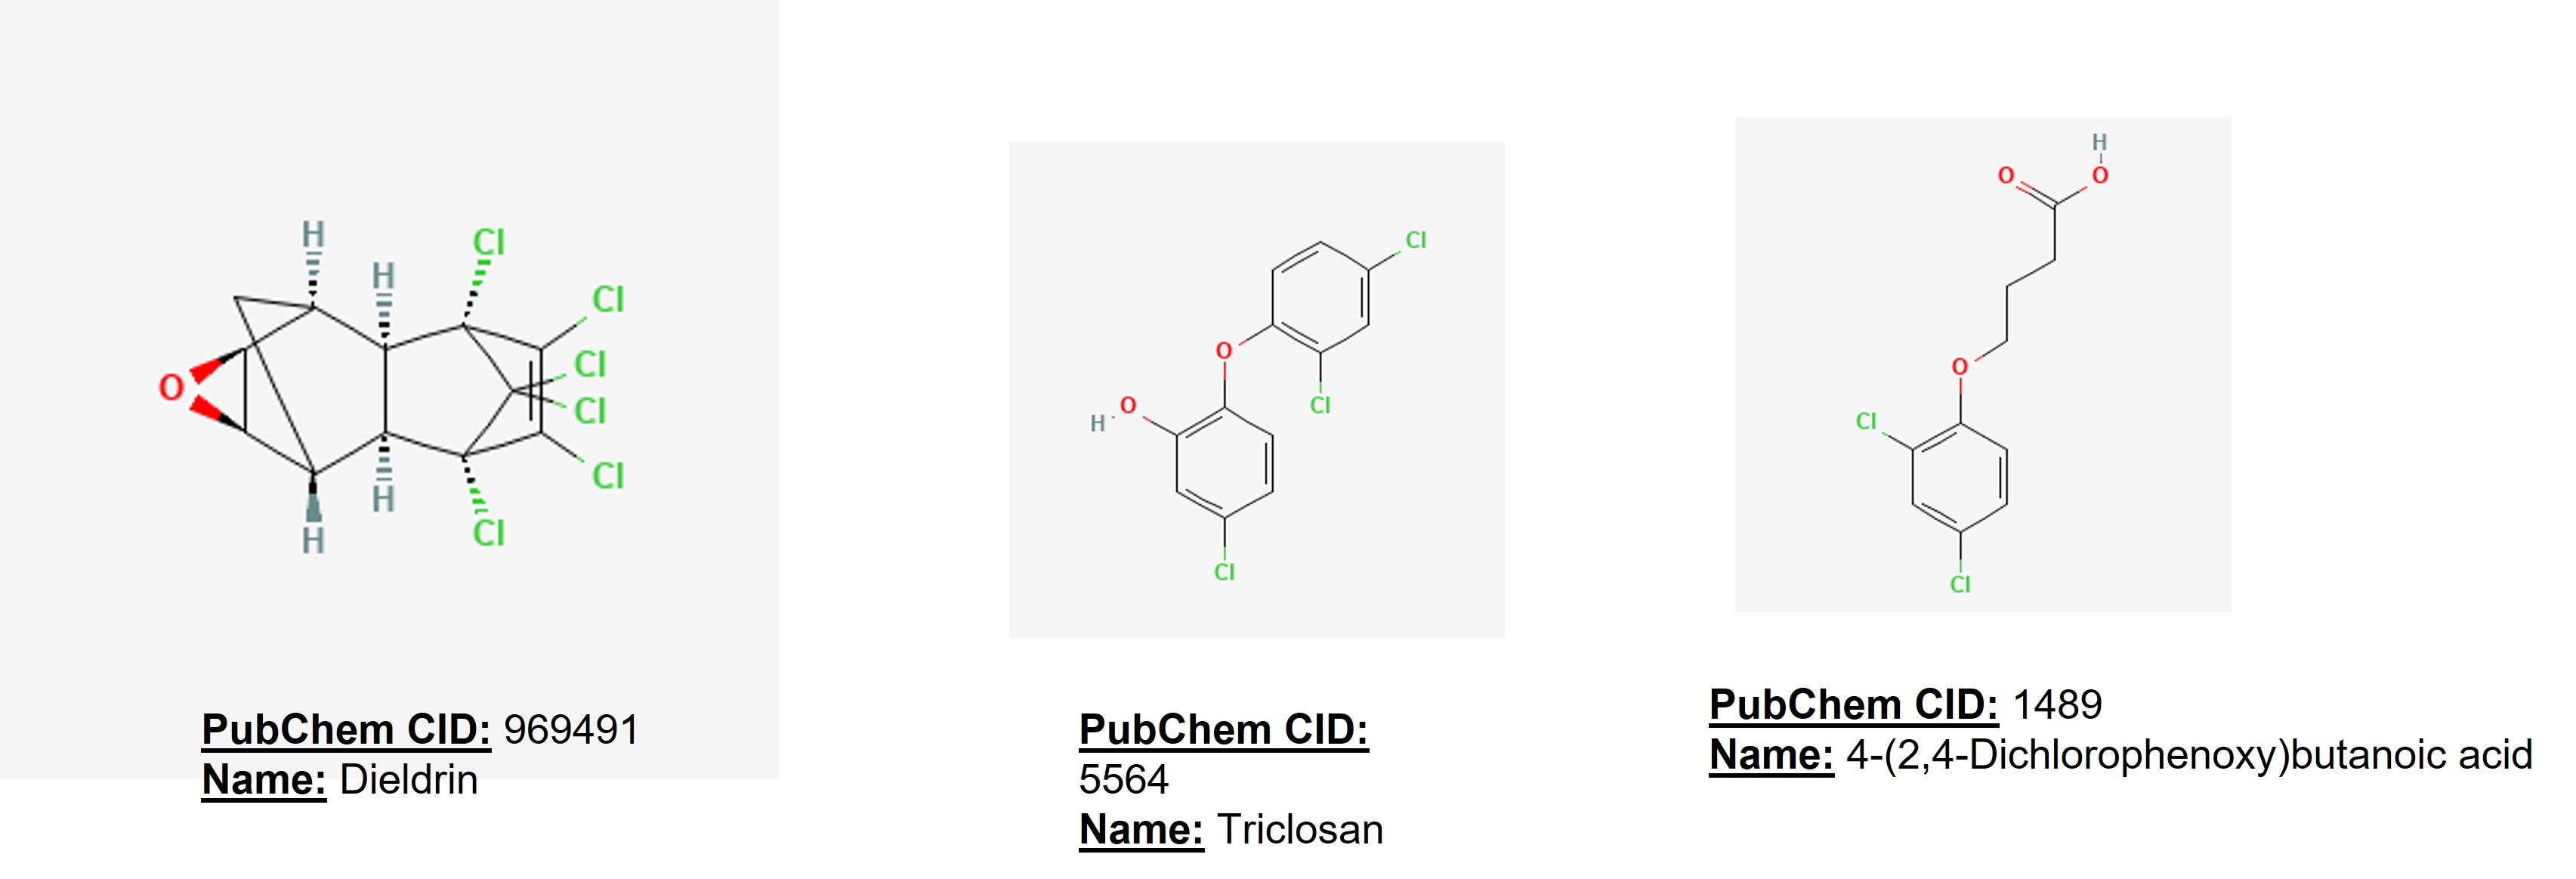

We want to work with steroid hormones and analogs, corticosteroids and maybe stradiol analogs. We may also work with Flutamides due to their inbhition activiy. 


Quick overview of some compounds that are classified as **active agonist** in ***Ratio activity*** column. 

In [12]:
df[df['Ratio_Activity'] == 'active agonist'].head(10)

,SID,CID,Activity_Outcome,Activity_Score,Activity_Summary,Ratio_Activity,Ratio_Potency_(uM),Ratio_Efficacy (%),530 nm Activity,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Blue (460 nm) auto fluorescence outcome
,,,,,,,,,,,,,,,
2,144203554,9403,Active,53,active agonist,active agonist,2.58222,110.3840,inactive,0,0,active agonist,3.25083,123.948,inactive
23,144203575,439501,Active,53,active agonist,active agonist,0.0393847,52.1584,inactive,0,0,active agonist,0.0425266,62.1126,inactive
103,144203655,2554,Active,51,active agonist,active agonist,4.41903,93.2540,inactive,0,0,active agonist,4.25266,89.0385,inactive
190,144203742,4184,Inconclusive,5,inconclusive,active agonist,26.8325,258.8200,active antagonist,26.8325,-82.0263,active antagonist,26.8325,-36.1245,inactive
282,144203834,5546,Inconclusive,30,inconclusive agonist (fluorescent),active agonist,19.7391,147.8920,inactive,0,0,active agonist,21.3138,240.298,fluorescent
318,144203870,5284486,Active,53,active agonist,active agonist,0.0552512,53.8189,inactive,0,0,active agonist,0.188658,86.0664,inactive
329,144203881,5995,Active,87,active agonist,active agonist,0.00422353,195.9400,inactive,0,0,active agonist,0.00422353,184.263,inactive
331,144203883,4993,Active,46,active agonist,active agonist,5.35378,20.1956,inactive,0,0,active agonist,10.6822,40.014,inactive
337,144203889,6047,Active,51,active agonist,active agonist,2.78822,80.8552,inactive,0,0,inconclusive agonist,1.79333,172.897,inactive


In results of next cell, we can observe there are 1044 compounds classified as **Inconclusive** in **Activity Outcome** column.

In [13]:
(df.Activity_Outcome == 'Inconclusive').sum()

1044

Quick overview of some compounds classified as **active agonist** in ***Ratio activity*** columnd but as **Inconclusive** in ***Activity Outcome*** column.

In [14]:
df[(df.Ratio_Activity == 'active agonist') & (df.Activity_Outcome == 'Inconclusive')]

,SID,CID,Activity_Outcome,Activity_Score,Activity_Summary,Ratio_Activity,Ratio_Potency_(uM),Ratio_Efficacy (%),530 nm Activity,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Blue (460 nm) auto fluorescence outcome
,,,,,,,,,,,,,,,
190,144203742,4184,Inconclusive,5,inconclusive,active agonist,26.8325,258.8200,active antagonist,26.8325,-82.0263,active antagonist,26.8325,-36.1245,inactive
282,144203834,5546,Inconclusive,30,inconclusive agonist (fluorescent),active agonist,19.7391,147.8920,inactive,0,0,active agonist,21.3138,240.298,fluorescent
402,144203954,8478,Inconclusive,5,inconclusive,active agonist,27.8822,75.6087,active antagonist,26.8325,-59.7779,active antagonist,23.9145,-51.1066,inactive
452,144204004,5281417,Inconclusive,30,inconclusive agonist (fluorescent),active agonist,9.4553,213.8330,inconclusive agonist,9.63848,36.3154,active agonist,10.2096,384.645,fluorescent
570,144204122,26596,Inconclusive,5,inconclusive,active agonist,0.0722784,36.4767,inactive,0,0,inactive,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,144213703,68589,Inconclusive,5,inconclusive,active agonist,51.671,213.8410,active antagonist,21.7895,-73.719,active antagonist,28.5045,-29.2262,inactive
10153,144213707,16682834,Inconclusive,5,inconclusive,active agonist,30.8956,148.7210,active antagonist,19.4938,-69.8602,inactive,0,0,inactive
10194,144213748,8816,Inconclusive,5,inconclusive,active agonist,58.5192,179.8190,active antagonist,54.1957,-90.59,active antagonist,39.8687,-43.906,inactive


After seeing some compounds from previous dataframe, we decided to not working with **active agonist** compounds that are classified as **inconclusive** too, because their chemical nature are far away of molecules of our interest. So next, we'll delete those **Inconclusive** compounds. We can include those compounds in a next iteration of model, but it's important to make some biochemical considerations before (These compounds express different phenotypes).

In [15]:
df = df[df.Activity_Outcome!= 'Inconclusive']

**Blue (460) nm** column will be deleted because that information won't be used. This information can be usefull if we were decided to work with active agonist compounds with inconclusive outcome. 

In [16]:
del(df['Blue (460 nm) auto fluorescence outcome'])

In [17]:
df = df.iloc[:,:-7]

In [18]:
df

,SID,CID,Activity_Outcome,Activity_Score,Activity_Summary,Ratio_Activity,Ratio_Potency_(uM)
,,,,,,,
0,144203552,12850184,Inactive,0,inactive,inactive,100
1,144203553,89753,Inactive,0,inactive,inactive,100
2,144203554,9403,Active,53,active agonist,active agonist,2.58222
3,144203555,13218779,Inactive,0,inactive,inactive,100
4,144203556,142766,Inactive,0,inactive,inactive,100
...,...,...,...,...,...,...,...
10481,144214045,8343,Inactive,0,inactive,inactive,100
10482,144214046,47898,Inactive,0,inactive,inactive,100
10483,144214047,5794,Inactive,0,inactive,inactive,100


In [19]:
df.Activity_Summary.unique()

array(['inactive', 'active agonist'], dtype=object)

We can observe that there are just **inactive** and **active agonist** values in ***Activity summary*** column, so this column will be deleted and results from ***Activity outcome** column will be taken account. ***Ratio activity*** column will be deleted too. 

In [20]:
del(df['Activity_Summary'])
del(df['Ratio_Activity'])

Quick overview of **Active** compounds in dataset. 

In [21]:
df[df.Activity_Outcome == 'Active']

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
2,144203554,9403,Active,53,2.58222
23,144203575,439501,Active,53,0.0393847
103,144203655,2554,Active,51,4.41903
318,144203870,5284486,Active,53,0.0552512
329,144203881,5995,Active,87,0.00422353
...,...,...,...,...,...
10396,144213960,13109,Active,55,0.001
10440,144214004,171660,Active,48,17.9904
10455,144214019,6010,Active,75,0.00504666


***Ratio potency (uM)*** values are converted into float data. 

In [22]:
df['Ratio_Potency_(uM)'] =  df['Ratio_Potency_(uM)'].astype(float)

Quick overview of DataFrame:

In [23]:
df

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
0,144203552,12850184,Inactive,0,100.00000
1,144203553,89753,Inactive,0,100.00000
2,144203554,9403,Active,53,2.58222
3,144203555,13218779,Inactive,0,100.00000
4,144203556,142766,Inactive,0,100.00000
...,...,...,...,...,...
10481,144214045,8343,Inactive,0,100.00000
10482,144214046,47898,Inactive,0,100.00000
10483,144214047,5794,Inactive,0,100.00000


In [24]:
len(df.CID.unique())

7419

There are 7419 unique compounds in dataset, but there are 9443 rows in the dataframe. The problem is that there are many compounds (CID) that have distincts SID. The **SID** values are ID for many chemical substances in PubChem, whereas CID are ID for chemical compounds. There are compounds that have different SID, but these substances may have different results in their **Activity Outcome**. 

In [25]:
from collections import Counter 

In [26]:
repeated_CID = Counter(df.CID.values)
print(repeated_CID)

Counter({0: 145, 727: 8, 16666: 6, 2879: 5, 4781: 4, 54670067: 4, 5344: 4, 13266: 4, 31236: 4, 1030: 4, 460: 4, 2723601: 4, 134601: 4, 86472: 4, 4616: 4, 54677470: 4, 9403: 3, 637566: 3, 443939: 3, 35370: 3, 2266: 3, 1989: 3, 2244: 3, 1986: 3, 2717: 3, 2708: 3, 22420: 3, 2727: 3, 2554: 3, 2796: 3, 4943: 3, 3385: 3, 3397: 3, 785: 3, 896: 3, 1046: 3, 4909: 3, 864: 3, 3440: 3, 4911: 3, 4993: 3, 6009: 3, 1349907: 3, 2206: 3, 4754: 3, 5333: 3, 5340: 3, 2955: 3, 4075: 3, 3293: 3, 7184: 3, 204: 3, 1983: 3, 5104: 3, 4632: 3, 5430: 3, 4114: 3, 4173: 3, 2761171: 3, 14985: 3, 29327: 3, 3463: 3, 5362: 3, 4891: 3, 444037: 3, 57363: 3, 3702: 3, 969516: 3, 10114: 3, 444795: 3, 174174: 3, 445354: 3, 2153: 3, 5320: 3, 5327: 3, 1775: 3, 5753: 3, 657298: 3, 6436: 3, 18283: 3, 6128: 3, 5284443: 3, 38852: 3, 159055: 3, 6654: 3, 23668192: 3, 11074431: 3, 7628: 3, 2767: 3, 5865: 3, 444913: 3, 8346: 3, 931: 3, 4684: 3, 5339: 3, 2478: 3, 338733: 3, 379: 3, 612: 3, 6781: 3, 1004: 3, 3423265: 3, 6421: 3, 9880: 3

In [27]:
len(list(filter(lambda x: repeated_CID[x] >= 2, repeated_CID)))

1610

There are 1610 values compounds that appear at least twice in **CID** column. Some repeated compounds are shown below with their CID and count. 

In [28]:
for cid, count in repeated_CID.most_common(20):
  print('CID: {} --> Count: {}'.format(cid, count))

CID: 0 --> Count: 145
CID: 727 --> Count: 8
CID: 16666 --> Count: 6
CID: 2879 --> Count: 5
CID: 4781 --> Count: 4
CID: 54670067 --> Count: 4
CID: 5344 --> Count: 4
CID: 13266 --> Count: 4
CID: 31236 --> Count: 4
CID: 1030 --> Count: 4
CID: 460 --> Count: 4
CID: 2723601 --> Count: 4
CID: 134601 --> Count: 4
CID: 86472 --> Count: 4
CID: 4616 --> Count: 4
CID: 54677470 --> Count: 4
CID: 9403 --> Count: 3
CID: 637566 --> Count: 3
CID: 443939 --> Count: 3
CID: 35370 --> Count: 3


Quick overview of these repeated compounds:

In [29]:
df[df.CID == 727]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
1293,144204846,727,Inactive,0,100.0
4320,144207874,727,Inactive,0,100.0
5421,144208975,727,Inactive,0,100.0
5713,144209267,727,Inactive,0,100.0
5934,144209488,727,Inactive,0,100.0
7387,144210941,727,Inactive,0,100.0
7716,144211270,727,Inactive,0,100.0
9688,144213242,727,Inactive,0,100.0


In [30]:
df[df.CID == 51]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
15,144203567,51,Inactive,0,100.0
4562,144208116,51,Inactive,0,100.0


In [31]:
df[df.CID == 5794]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
1033,144204585,5794,Inactive,0,100.0
10483,144214047,5794,Inactive,0,100.0


In [32]:
df[df.CID == 637566]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
9,144203561,637566,Inactive,0,100.0
6030,144209584,637566,Inactive,0,100.0
6902,144210456,637566,Inactive,0,100.0


In [33]:
df[df.CID == 16043]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
5,144203557,16043,Inactive,0,100.0
5953,144209507,16043,Inactive,0,100.0


In [34]:
df[df.CID == 9403]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
2,144203554,9403,Active,53,2.58222
2330,144205884,9403,Active,53,3.25083
8581,144212135,9403,Active,53,3.60216


We can observe that one compound can be registered three times in distinct substances with different values for **Ratio Potency**. We decided to explore many cases of this situation. 

In [35]:
repeated_active_CID = Counter(filter(lambda x: x in repeated_CID, list(df.CID[df.Activity_Outcome == 'Active'])))
print(repeated_active_CID)

Counter({0: 40, 9403: 3, 5753: 3, 6128: 3, 5865: 3, 14710: 3, 5757: 3, 5284416: 3, 5755: 3, 5284557: 3, 13109: 3, 11273: 3, 5994: 3, 6010: 3, 9904: 3, 439501: 2, 5284486: 2, 5995: 2, 6166: 2, 6741: 2, 9878: 2, 236702: 2, 3334: 2, 9324: 2, 5754: 2, 10635: 2, 16682730: 2, 5281034: 2, 6238: 2, 6279: 2, 6230: 2, 16684434: 2, 31307: 2, 222786: 2, 443831: 2, 441207: 2, 5876: 2, 443939: 2, 28417: 2, 9782: 2, 9270: 2, 4807: 2, 656583: 2, 5282164: 2, 31378: 2, 5833: 2, 6446: 2, 16961: 2, 6526396: 2, 68570: 2, 25644: 2, 4420: 2, 11057: 2, 40000: 2, 19042: 2, 26041: 2, 9153: 2, 28803: 2, 2554: 1, 4993: 1, 6047: 1, 6231: 1, 5344: 1, 9051: 1, 224246: 1, 16490: 1, 443935: 1, 247839: 1, 3634: 1, 6473881: 1, 108013: 1, 5282493: 1, 6714002: 1, 636374: 1, 23671691: 1, 5282494: 1, 440707: 1, 222757: 1, 71414: 1, 5952: 1, 5311067: 1, 30323: 1, 62960: 1, 2724385: 1, 10204: 1, 667493: 1, 637511: 1, 636362: 1, 73093: 1, 13791: 1, 5834: 1, 9818306: 1, 26133: 1, 32798: 1, 5362123: 1, 13789: 1, 6975516: 1, 6019

In [36]:
len(list(filter(lambda x: repeated_active_CID[x] >= 2, repeated_active_CID)))

58

There are 58 CID classified as **Active** that appear at least twice in the dataframe. Many examples are shown below.

In [37]:
df[df.CID == 9403]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
2,144203554,9403,Active,53,2.58222
2330,144205884,9403,Active,53,3.25083
8581,144212135,9403,Active,53,3.60216


In [38]:
df[df.CID == 5865]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
1013,144204565,5865,Active,58,0.145209
5208,144208762,5865,Active,56,0.144922
6962,144210516,5865,Active,59,0.132810


In [39]:
df[df.CID == 441207]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
1658,144205212,441207,Active,53,0.045919
9032,144212586,441207,Active,53,0.024704


In [40]:
df[df.CID == 6279]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
1318,144204872,6279,Active,56,0.258222
3785,144207339,6279,Active,55,0.436145


An explanation for this situation may due to the conformation of the compound: it's probably that there are different **Ratio potency** values because there are distinct conformers of the same compound but in distinct chemical substances.

In following cells, we'll explore some of these repeated active CID from previous cell and we'll check their rotable bonds **(rotbonds)**. This information belongs to one dataset which we'll use a lot later and it will be explained. 

In [41]:
d = pd.read_csv('https://raw.githubusercontent.com/StevieCL/Random_Forest_Classifier_AR/master/Files/Resultados_busqueda_tox.csv')
d.drop(d.columns[-10:], axis='columns', inplace=True)

In [42]:
d[d.cid == 6279]

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles
1308,6279,Medroxyprogesterone acetate,Medroxyprogesterone acetate|Medroxyprogesteron...,386.5,C24H34O4,60.4,767.0,4.1,28,0,4,3,InChI=1S/C24H34O4/c1-14-12-18-19(22(4)9-6-17(2...,C[C@H]1C[C@@H]2[C@H](CC[C@]3([C@H]2CC[C@@]3(C(...


In [43]:
d[d.cid == 441207]

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles
1633,441207,Digitoxin,digitoxin|Digitoxoside|71-63-6|Digitoksin|Digi...,764.9,C41H64O13,183.0,1410.0,2.3,54,5,13,7,InChI=1S/C41H64O13/c1-20-36(46)29(42)16-34(49-...,C[C@@H]1[C@H]([C@H](C[C@@H](O1)O[C@@H]2[C@H](O...


In [44]:
d[d.cid == 5865]

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles
1005,5865,Prednisone,prednisone|53-03-2|Dehydrocortisone|Decortin|D...,358.4,C21H26O5,91.7,764.0,1.5,26,2,5,2,InChI=1S/C21H26O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12CC(=O)[C@H]3[C@H]([C@@H]1CC[C@@]2(C(=O)...


We can see these compounds have many rotable bonds, so we can say our explanation for variety of ratio potency for same compounds may be right.

Maybe you noticed that many CID have 0 for value. This is happening because at beginning, we replaced NaN values from this column by 0. These compounds have SID but not CID registered in PubChem. Many examples of this situation are shown below.

In [45]:
df[df.CID == 0]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
2155,144205709,0,Inactive,0,100.0
2693,144206247,0,Inactive,0,100.0
2777,144206331,0,Inactive,0,100.0
2912,144206466,0,Inactive,0,100.0
2942,144206496,0,Inactive,0,100.0
...,...,...,...,...,...
9427,144212981,0,Inactive,0,100.0
9433,144212987,0,Inactive,0,100.0
9466,144213020,0,Inactive,0,100.0


Not all of these compounds are classified as **Inactive**, there are 40 **Active** compounds as we can see next. 

In [46]:
len(df[(df.CID == 0) & (df.Activity_Outcome == 'Active')])

40

In [47]:
(df[(df.CID == 0) & (df.Activity_Outcome == 'Active')]).head()

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
6697,144210251,0,Active,50,3.647490
6698,144210252,0,Active,53,0.952052
6699,144210253,0,Active,51,2.788220
6700,144210254,0,Active,47,16.930100
6702,144210256,0,Active,48,10.682200


In next cell, we can observe that many **Active** compounds have **100** in their result in **Ratio potency**. 

In [48]:
df[(df.Activity_Outcome == 'Active') & (df['Ratio_Potency_(uM)'] == 100)]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
5406,144208960,11057,Active,40,100.0
5554,144209108,8722,Active,44,100.0


There are not compounds classified as **Inactive** with a different value of **100** in **Ratio potency**

In [49]:
df[(df.Activity_Outcome == 'Inactive') & (df['Ratio_Potency_(uM)'] != 100)]

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,


We'll delete compounds with **CID = 0** and **Active** compounds with **Ratio potency = 0**

In [50]:
df = df[df.CID != 0]
df = df.drop(df[(df.Activity_Outcome == 'Active') & (df['Ratio_Potency_(uM)'] == 100)].index)

Now we have to delete CID duplicates in order to have  'chemical objects' with only one **SID** and one **CID**. This is not a simple task, because, just as shown earlier, we have different situations for compounds, we just can't delete duplicates using a Pandas function. 

We have:

* Compounds that are active in one substance and inactive in another one (SID). 
* Compounds with different **Ratio porency** values for same CID but different substances. 

To deal with this problem, we'll follow the next steps:
* For those compounds that are active in one substance and inactive in others, it was decided to work only with the active one.

* For active compounds that have different **Ratio potency** values, it was decided to work with the minimum **Ratio potency** value, because it's assumed that this value belongs to one of the conformers of the compound and that's the one with major affinity to the nuclear receptor. 

In [51]:
# This list contains CIDs of active compounds that appears at least twice
# in DataFrame (df)
lst_repeated_active_CID = list(filter(lambda x: repeated_active_CID[x] >= 2, repeated_active_CID))

In [ ]:
for cid in lst_repeated_active_CID:
  if cid == 0: # Ignore compounds with CID=0 previously deleted
    continue

  active = len(df[(df.CID == cid) & (df.Activity_Outcome == 'Active')])     # Number of CID with outcome='Active'
  inactive = len(df[(df.CID == cid) & (df.Activity_Outcome == 'Inactive')]) # Number of CID with outcome='Inactive'

  min = (df[df.CID == cid]['Ratio_Potency_(uM)']).min()
  # All ratio potency values of the compound will be equal to the minimum one
  df['Ratio_Potency_(uM)'][(df.CID == cid) & (df.Activity_Outcome == 'Active')] = min

  # If the compound has outcome='Inactive' too, this or these outcomes (inactive) 
  # will be deleted
  if inactive > 0:
    df.drop(df[(df.CID == cid) & (df.Activity_Outcome == 'Inactive')].index, inplace=True)

Now all of these compounds with many ratio potency values will have only one: the minimum one and if the same compound had inactive ratio potency values too, these inactive values were deleted. Now we can just use the **drop_duplicates()** method without any inconvenience. 

In [53]:
df = df.drop_duplicates(subset='CID', keep='first')

In [54]:
df

,SID,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM)
,,,,,
0,144203552,12850184,Inactive,0,100.00000
1,144203553,89753,Inactive,0,100.00000
2,144203554,9403,Active,53,2.58222
3,144203555,13218779,Inactive,0,100.00000
4,144203556,142766,Inactive,0,100.00000
...,...,...,...,...,...
10480,144214044,74483,Inactive,0,100.00000
10481,144214045,8343,Inactive,0,100.00000
10482,144214046,47898,Inactive,0,100.00000


## Data merge

The following dataframe contains all compounds used in Tox21 program. It was downloaded from PubChem. This dataset has important chemical information of every compound like nomenclature, molecular weight, polar area and more. Some of this information will be used to performance a statistical analysis. We'll use molecular weight, polar area, heavy atoms count (heavycnt), hydrogen bond donors and acceptors and rotable bonds. At the end, we'll use the SMILE string of every compound in order to create the dataset which will be used to train the machine learning model. 

In [55]:
d.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles
0,12850184,Calcium 5-ketogluconate,Calcium 5-ketogluconate|UNII-1C59PKC55M|1C59PK...,426.34,C12H18CaO14,276.0,196.0,NaN,27,8,14,8,InChI=1S/2C6H10O7.Ca/c2*7-1-2(8)3(9)4(10)5(11)...,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...
1,89753,Barium gluconate,"barium gluconate|D-Gluconic acid, barium salt|...",527.60,C12H22BaO14,283.0,165.0,NaN,27,10,14,8,InChI=1S/2C6H12O7.Ba/c2*7-1-2(8)3(9)4(10)5(11)...,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...
2,9403,Estradiol cypionate,estradiol cypionate|313-06-4|Depofemin|Depoest...,396.60,C26H36O3,46.5,597.0,7.1,29,1,3,5,InChI=1S/C26H36O3/c1-26-15-14-21-20-10-8-19(27...,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...
3,13218779,Isobornyl thiocyanoacetate,Thanite|ISOBORNYL THIOCYANOACETATE|Bornate|Cid...,253.36,C13H19NO2S,75.4,384.0,4.0,17,0,4,4,"InChI=1S/C13H19NO2S/c1-12(2)9-4-5-13(12,3)10(6...",C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N
4,142766,8-Hydroxyquinoline salicylate,Oxyquinoline salicylate|NSC3907|2439-07-8|UNII...,283.28,C16H13NO4,90.6,270.0,NaN,21,3,5,1,InChI=1S/C9H7NO.C7H6O3/c11-8-5-1-3-7-4-2-6-10-...,C1=CC=C(C(=C1)C(=O)O)O.C1=CC2=C(C(=C1)O)N=CC=C2


In [56]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9594 entries, 0 to 9593
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          9594 non-null   int64  
 1   cmpdname     9594 non-null   object 
 2   cmpdsynonym  9594 non-null   object 
 3   mw           9594 non-null   float64
 4   mf           9594 non-null   object 
 5   polararea    9594 non-null   float64
 6   complexity   9594 non-null   float64
 7   xlogp        7221 non-null   float64
 8   heavycnt     9594 non-null   int64  
 9   hbonddonor   9594 non-null   int64  
 10  hbondacc     9594 non-null   int64  
 11  rotbonds     9594 non-null   int64  
 12  inchi        9594 non-null   object 
 13  isosmiles    9594 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.0+ MB


**xlogp** column has a lot of null values. The logP value is an important Lipinski descriptor, but it won't be included into the statistical analysis because of those null values. Some columns will be deleted too because they will not be used.

In [57]:
d.drop(['xlogp','cmpdname','cmpdsynonym', 'mf','inchi'], axis='columns', inplace=True) 
d.head()

,cid,mw,polararea,complexity,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles
0,12850184,426.34,276.0,196.0,27,8,14,8,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...
1,89753,527.60,283.0,165.0,27,10,14,8,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...
2,9403,396.60,46.5,597.0,29,1,3,5,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...
3,13218779,253.36,75.4,384.0,17,0,4,4,C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N
4,142766,283.28,90.6,270.0,21,3,5,1,C1=CC=C(C(=C1)C(=O)O)O.C1=CC2=C(C(=C1)O)N=CC=C2


Columns names are fixed in order to work easily with them.

In [58]:
d.columns= ['CID', 'MW', 'Polar_Area', 'Complexity', 'Heavy_Count', 'HBondDonor', 'HBondAcc', 'RotBonds', 'IsoSMILES']

In [59]:
d.head()

,CID,MW,Polar_Area,Complexity,Heavy_Count,HBondDonor,HBondAcc,RotBonds,IsoSMILES
0,12850184,426.34,276.0,196.0,27,8,14,8,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...
1,89753,527.60,283.0,165.0,27,10,14,8,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...
2,9403,396.60,46.5,597.0,29,1,3,5,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...
3,13218779,253.36,75.4,384.0,17,0,4,4,C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N
4,142766,283.28,90.6,270.0,21,3,5,1,C1=CC=C(C(=C1)C(=O)O)O.C1=CC2=C(C(=C1)O)N=CC=C2


SID column will be deleted because is not important anymore.

In [60]:
df.drop('SID', axis='columns', inplace=True)

Now we'll merge these two datasets on CID column. The result is an organized dataset (df_stat) with all the information required to do the analysis.

In [61]:
df_stat = pd.merge(df, d, on='CID', how='inner')

In [62]:
df_stat

,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM),MW,Polar_Area,Complexity,Heavy_Count,HBondDonor,HBondAcc,RotBonds,IsoSMILES
0,12850184,Inactive,0,100.00000,426.34,276.0,196.0,27,8,14,8,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...
1,89753,Inactive,0,100.00000,527.60,283.0,165.0,27,10,14,8,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...
2,9403,Active,53,2.58222,396.60,46.5,597.0,29,1,3,5,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...
3,13218779,Inactive,0,100.00000,253.36,75.4,384.0,17,0,4,4,C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N
4,142766,Inactive,0,100.00000,283.28,90.6,270.0,21,3,5,1,C1=CC=C(C(=C1)C(=O)O)O.C1=CC2=C(C(=C1)O)N=CC=C2
...,...,...,...,...,...,...,...,...,...,...,...,...
7412,74483,Inactive,0,100.00000,500.13,62.8,727.0,29,1,20,7,C(C(C(C(C(F)(F)S(=O)(=O)O)(F)F)(F)F)(F)F)(C(C(...
7413,8343,Inactive,0,100.00000,390.60,52.6,394.0,28,0,4,16,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC
7414,47898,Inactive,0,100.00000,323.31,38.3,398.0,23,1,5,4,CC(C)OC1=CC=CC(=C1)NC(=O)C2=CC=CC=C2C(F)(F)F
7415,3034285,Inactive,0,100.00000,403.40,104.0,646.0,30,0,8,8,CO/C=C(\\C1=CC=CC=C1OC2=NC=NC(=C2)OC3=CC=CC=C3...


Finally, a CSV file is generated with the final dataset. 

In [63]:
df_stat.to_csv('Data_statistics.csv')